[18.62238205 19.56859203 19.56388266 22.22528599 22.97359436 25.91748861
 28.03269432 34.62419338 44.50877712]


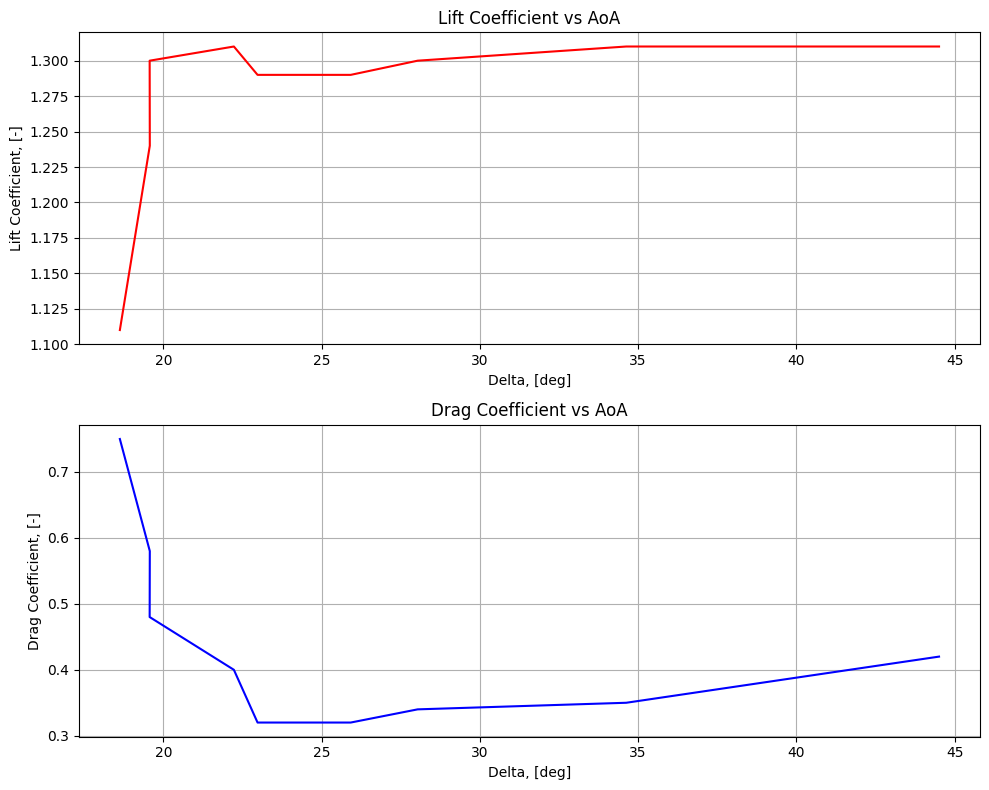

In [25]:
import numpy as np
import matplotlib.pyplot as plt

n_nodes = 9
max_wind = 13

# Define wind speed
v_wind = np.ones(n_nodes) * max_wind

# Define the tangential component
u_r = np.array([19.55, 16.90, 22.19, 24.84, 14.25, 27.48, 11.61, 8.96, 6.31])

# Define angles
alpha = np.array([15.0, 18.0, 10.8, 5.4, 19.4, -0.60, 20.20, 20.80, 19.60])
beta = np.degrees(np.arctan2(v_wind, u_r))
delta = beta - alpha

print(delta)

# Define aerodynamic coefficients
cl_list = np.array([1.11, 1.24, 1.30, 1.31, 1.29, 1.29, 1.30, 1.31, 1.31])
cw_list = np.array([0.75, 0.58, 0.48, 0.40, 0.32, 0.32, 0.34, 0.35, 0.42])

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

ax[0].plot(delta, cl_list, 'r')
ax[0].set_title('Lift Coefficient vs AoA')
ax[0].set_xlabel('Delta, [deg]')
ax[0].set_ylabel('Lift Coefficient, [-]')
ax[0].grid()

ax[1].plot(delta, cw_list, 'b')
ax[1].set_title('Drag Coefficient vs AoA')
ax[1].set_xlabel('Delta, [deg]')
ax[1].set_ylabel('Drag Coefficient, [-]')
ax[1].grid()

plt.tight_layout()
plt.show()

